
# **Tesla Stock Price Analysis and Forecasting Using Time Series and Machine Learning**

**Project Motivation:**

 * Learning how integrating machine learning with traditional financial analysis can improve forecasting and decision-making.

**Objectives:**

  * Analyze historical stock price data to identify key patterns such as trend, seasonality, and volatility.
  * Integrating technical indicators, machine learning models, and financial fundamentals, with comparative evaluation against key indices (S&P 500 and Nasdaq) and high-volume tech stocks.
  * Engineer, build and evaluate forecasting models to predict future stock prices over short and medium-term horizons.
  * The end goal is to simulate investment decisions and portfolio allocations, provide actionable insights for portfolio management or trading strategies grounded in statistical rigor and machine learning.

**Why Tesla?**

 Tesla (TSLA) stands out as a case study for several reasons:

 * Volatility: TSLA's price is known for sharp swings, which provides dynamic and challenging data for modeling.

 * Retail & media impact: Tesla is one of the most discussed stocks in financial media and social networks.

 * Narrative-driven: News, tweets, and speculation often impact price more than fundamentals, making it a unique asset to model.

 * Growth story: From early growth to becoming an S&P 500 company, Tesla’s journey offers exposure to different market regimes and behaviors.

 * Practical exposure: Working on a volatile, high-profile stock creates a learning environment close to real-world applications in asset management and fintech.

**Dataset Overview:**
* Source: The dataset was sourced from Kaggle, containing historical daily stock data for Tesla Inc. (TSLA).

* Time period: Covers approximately 10 years of data (from 2015/01/01 - 2024/01/16).

* Structure: Includes columns Date, Open, High, Low, Close, Volume.

**Cleanliness:** 
 * The dataset required minimal preprocessing. There were no missing values in key features (Close, Date, Volume, etc.), making it suitable for direct use in modeling after generating technical indicators.


---

**Formatting and Structure Analysis:**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf
import numpy as np
import statsmodels as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Styling 
sns.set(style="whitegrid")
plt.style.use("ggplot")

In [29]:
df= pd.read_csv(r'C:\Users\masil\Downloads\TeslaStockData\TSLA Stock Data.csv', index_col="Date", parse_dates=True)
df.index = pd.to_datetime(df.index)
df = df.drop(columns=["Unnamed: 0"])
df.info()
df.head()
# Notebook was split into many files so this is so the code in the modelling section does not fail
df.to_parquet(r"C:\Users\masil\Downloads\TeslaStockData\tesla_cleaned.parquet", engine='fastparquet')



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2274 entries, 2015-01-02 to 2024-01-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2274 non-null   float64
 1   High    2274 non-null   float64
 2   Low     2274 non-null   float64
 3   Close   2274 non-null   float64
 4   Volume  2274 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.6 KB


**Figure 1. Tesla's Closing Prices from 2015-2024**

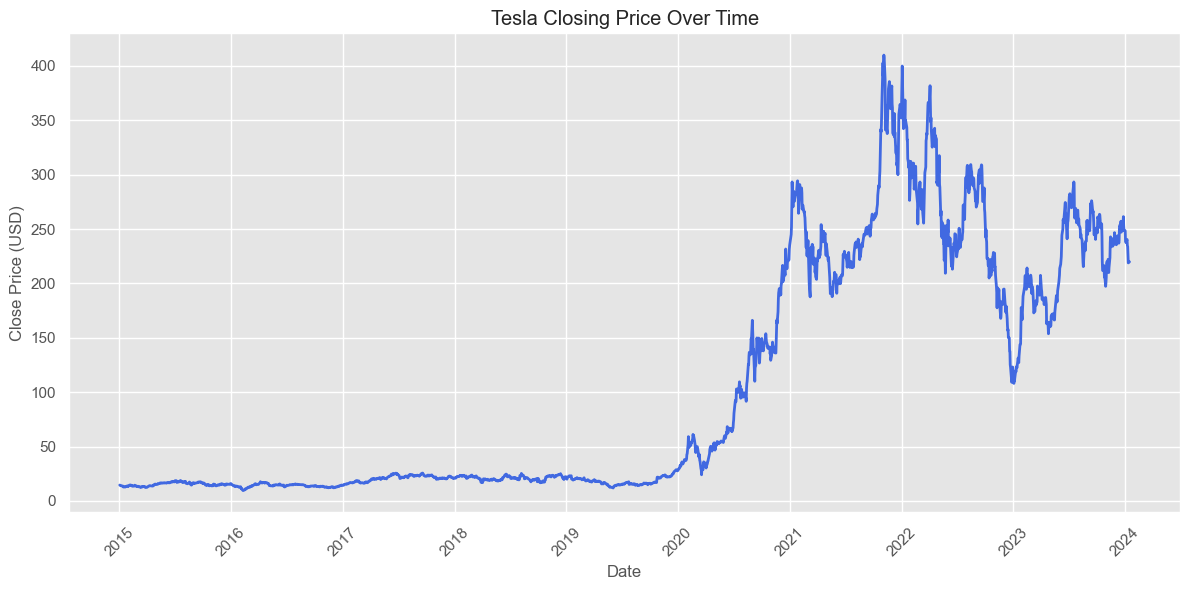

count    2274.000000
mean      103.461794
std       111.032019
min         9.578000
25%        16.693666
50%        23.197333
75%       215.227497
max       409.970001
Name: Close, dtype: float64

In [30]:
plt.figure(figsize=(12,6))

#plot closing price 
plt.plot (df.index, df['Close'], color = "royalblue", linewidth = 2)
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary stats
df['Close'].describe()
# Visualizing the distribution of closing prices

**Figure 1.**
The initial plot of Tesla’s closing price over time quickly reveals the stock’s dramatic journey: stable prices (2015–2019), explosive growth (2020–2021), and high volatility with sharp corrections (2022–2024). 


**Figure 2. Decomposition Plot of Tesla's Price Trend**

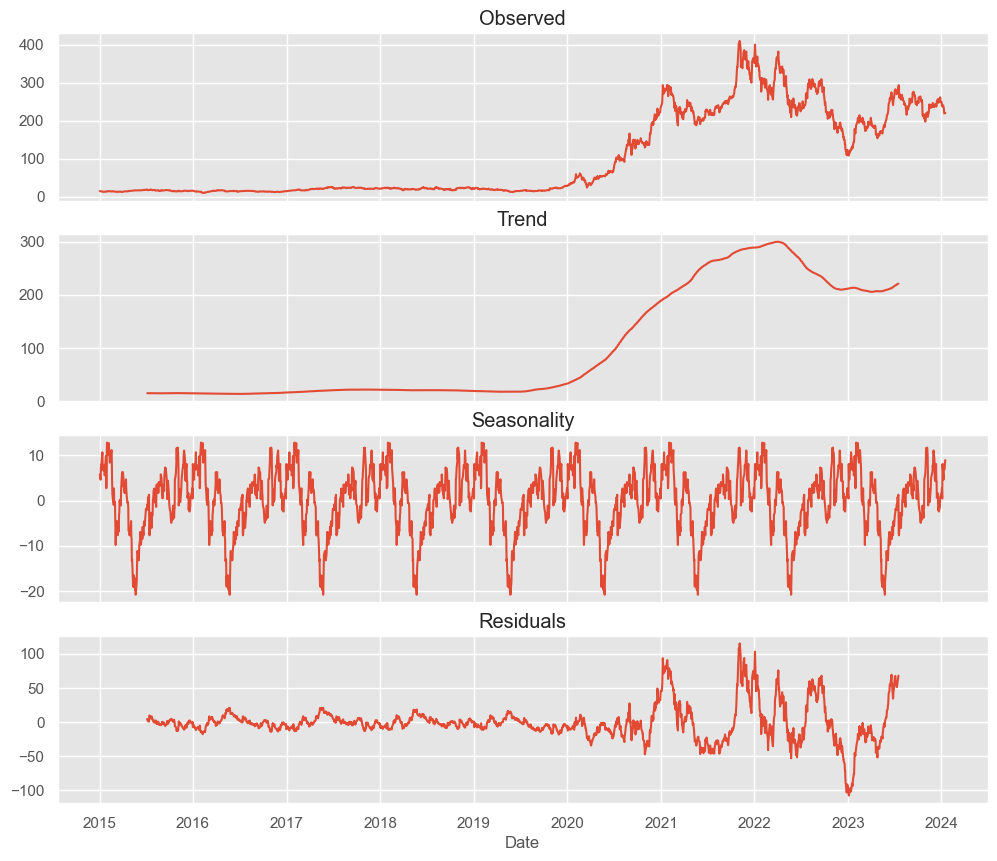

In [31]:
result = seasonal_decompose(df['Close'], model='additive', period=252)  # 252 trading days per year
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(result.observed)
axs[0].set_title('Observed')

axs[1].plot(result.trend)
axs[1].set_title('Trend')

axs[2].plot(result.seasonal)
axs[2].set_title('Seasonality')

axs[3].plot(result.resid)
axs[3].set_title('Residuals')

plt.xlabel('Date')
plt.show()


**Figure 2.**

**1. Observed:**
This is the actual closing price series.It shows a long period of relative stability (2015–2019), followed by explosive growth (2020–2021), and then high volatility with sharp drawdowns (2022–2024).

**2. Trend:**
The trend line is flat until late 2019, then rises steeply through 2021, peaking around 2022. After the peak, the trend declines, reflecting Tesla’s correction and increased volatility.

**3. Seasonality:**
Regular, repeating oscillations are visible, with a yearly (252 trading days) pattern. There is a modest, recurring seasonal pattern, but it is much smaller than the trend or volatility.

**4. Residuals:**
Residuals are small and stable until 2020, then become much larger and more volatile. Most of the “unexplained” price movement (risk) occurs during and after the explosive growth phase, reflecting increased uncertainty and market reactions


**Figure 3. Tesla Closing Price with Moving Averages**

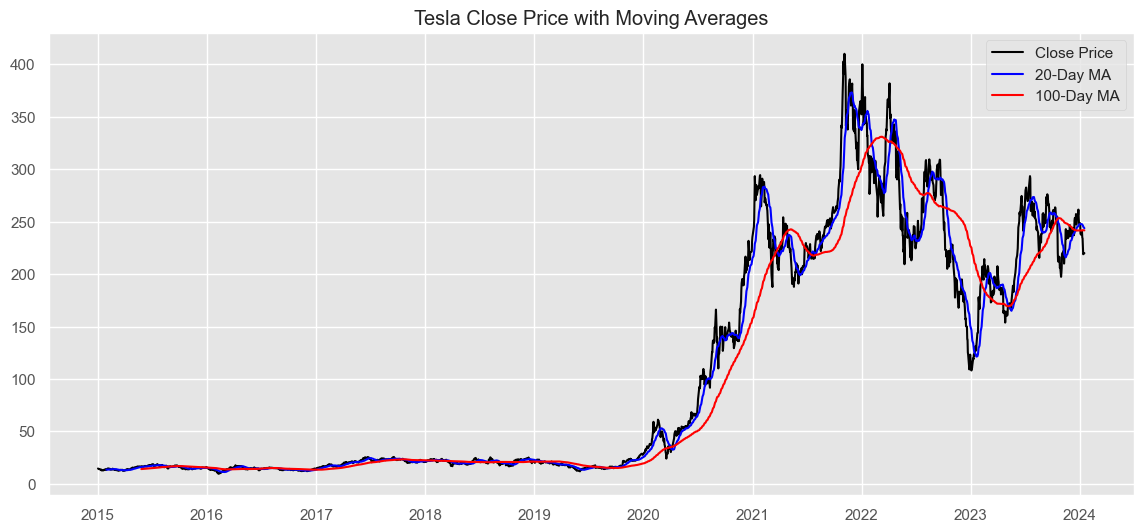

In [32]:
# Create moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA_20'], label='20-Day MA', color='blue')
plt.plot(df['MA_100'], label='100-Day MA', color='red')
plt.title('Tesla Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


**Figure 3.**
The moving average plot highlights Tesla’s price trend and smooths out short-term fluctuations. The 20-day and 100-day averages help visualize momentum shifts, trend reversals, and periods of sustained growth or correction.

**Figure 4. Granger Causality Test**

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests

# Create a new DataFrame with only required columns
gc_df = df[['Close', 'Volume']].dropna()

# Run Granger Causality Test
grangercausalitytests(gc_df[['Close', 'Volume']], maxlag=5, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4871  , p=0.4853  , df_denom=2270, df_num=1
ssr based chi2 test:   chi2=0.4877  , p=0.4849  , df=1
likelihood ratio test: chi2=0.4877  , p=0.4850  , df=1
parameter F test:         F=0.4871  , p=0.4853  , df_denom=2270, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8887  , p=0.1515  , df_denom=2267, df_num=2
ssr based chi2 test:   chi2=3.7858  , p=0.1506  , df=2
likelihood ratio test: chi2=3.7827  , p=0.1509  , df=2
parameter F test:         F=1.8887  , p=0.1515  , df_denom=2267, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6042  , p=0.1864  , df_denom=2264, df_num=3
ssr based chi2 test:   chi2=4.8275  , p=0.1849  , df=3
likelihood ratio test: chi2=4.8224  , p=0.1853  , df=3
parameter F test:         F=1.6042  , p=0.1864  , df_denom=2264, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3330  , p=0.

c:\Users\masil\Downloads\TeslaStockData\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(0.4871055818459751),
    np.float64(0.48529276901762053),
    np.float64(2270.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.48774933371625606),
    np.float64(0.48493299651123367),
    np.int64(1)),
   'lrtest': (np.float64(0.48769700961202034),
    np.float64(0.4849564181583005),
    np.int64(1)),
   'params_ftest': (np.float64(0.4871055807363645),
    np.float64(0.48529276951468825),
    np.float64(2270.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.888745445577617),
    np.float64(0.1514994040269806),
    np.float64(2267.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(3.7858223664334765),
    np.float64(0.15063265066706505),
    np.int64(2)),
   'lrtest': (np.float64(3.7826717173429643),
    np.float64(0.1508701329857284),
    np.int64(2)),
   'params_ftest': (np.float64(1.888745479992797),
    np.float64(0.1514993988217144),
    np.float64(2267.0),
    2.0)},
   array([[0., 0., 1., 0., 0.]

**Figure 4.**
The Granger Causality Test shows the influence volume has on the prediction of future stock prices. The output shows us that for all lags (1-5), the p-values are greater that 0.05 which means that there is no statistically significant evidence that changes in volume causes changes in the Tesla's closing price in this dataset.

**Figure 5.** Autocorrelation, Partial Autocorrelation, and Lag Plots

<Figure size 1000x400 with 0 Axes>

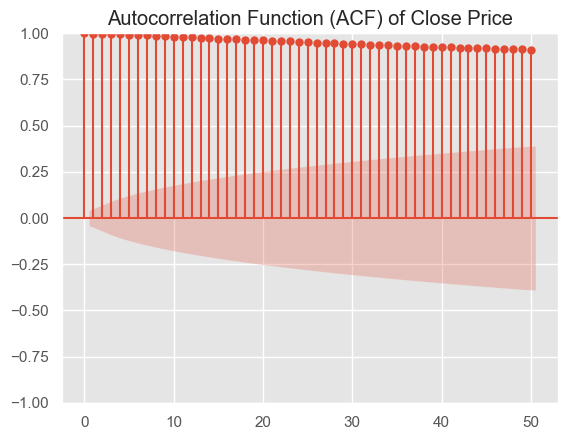

<Figure size 1000x400 with 0 Axes>

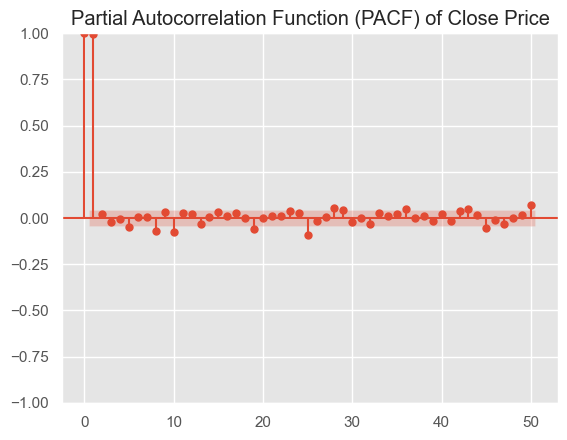

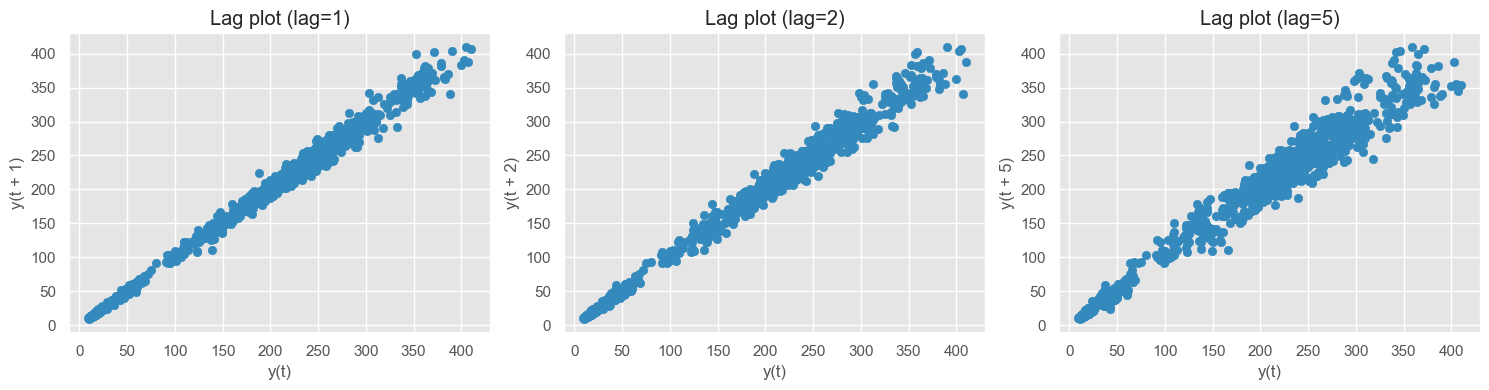

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

price_series = df['Close']

# 1. Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10,4))
plot_acf(price_series, lags=50)
plt.title('Autocorrelation Function (ACF) of Close Price')
plt.show()

# 2. Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10,4))
plot_pacf(price_series, lags=50, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Close Price')
plt.show()

# 3. Lag plots to visually inspect relationships for selected lags (e.g., lag 1, 2, 5)
fig, axes = plt.subplots(1, 3, figsize=(15,4))
lags = [1, 2, 5]
for i, lag in enumerate(lags):
    lag_plot(price_series, lag=lag, ax=axes[i])
    axes[i].set_title(f'Lag plot (lag={lag})')
plt.tight_layout()
plt.show()


**Figure 5.**

**Autocorrelation Function (ACF) Plot**
- Shows very high autocorrelation for all lags up to 50.
- Indicates Tesla’s closing price is strongly correlated with its past values; the series is highly persistent and non-stationary.


**Partial Autocorrelation Function (PACF) Plot**
- Strong spike at lag 1, near zero for higher lags.
- Implies that most of the autocorrelation is explained by the previous day’s price; further lags add little new information.
- Suggests an AR(1) structure (autoregressive of order 1) is appropriate for modeling.

**Lag Plots (lags 1, 2, 5)**
- Points form a tight diagonal line for all lags.
- Indicates a strong linear relationship between today’s price and previous days’ prices.
- The relationship weakens slightly as lag increases, but remains strong even at lag 5.

**Figure 6.** Statistical Analysis of Log Returns

Mean Log Return: 0.001191
Volatility (Std Dev): 0.035969
Skewness: -0.1602
Kurtosis: 4.4002
Shapiro-Wilk p-value: 0.0000 (normal if > 0.05)
Jarque-Bera p-value: 0.0000 (normal if > 0.05)


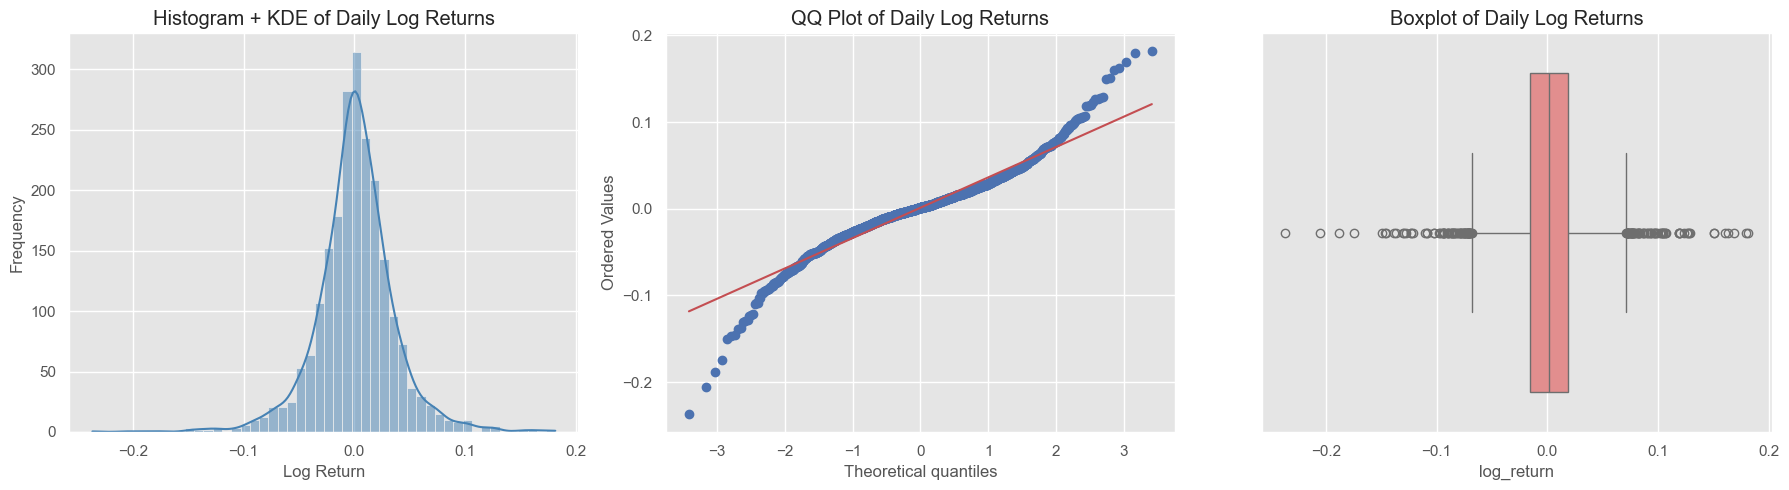

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, jarque_bera, probplot

# Calculate daily log returns
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df = df.dropna()

# Summary statistics
mean_return = df['log_return'].mean()
volatility = df['log_return'].std()
skewness = skew(df['log_return'])
kurt = kurtosis(df['log_return'])
shapiro_stat, shapiro_p = shapiro(df['log_return'])
jb_stat, jb_p = jarque_bera(df['log_return'])

print(f"Mean Log Return: {mean_return:.6f}")
print(f"Volatility (Std Dev): {volatility:.6f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f} (normal if > 0.05)")
print(f"Jarque-Bera p-value: {jb_p:.4f} (normal if > 0.05)")

# Plotting
plt.figure(figsize=(18,5))

# Histogram + KDE
plt.subplot(1,3,1)
sns.histplot(df['log_return'], bins=50, kde=True, color='steelblue')
plt.title('Histogram + KDE of Daily Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# QQ plot
plt.subplot(1,3,2)
probplot(df['log_return'], dist="norm", plot=plt)
plt.title('QQ Plot of Daily Log Returns')

# Boxplot
plt.subplot(1,3,3)
sns.boxplot(x=df['log_return'], color='lightcoral')
plt.title('Boxplot of Daily Log Returns')

plt.tight_layout()
plt.show()


**Figure 6.**
- **Histogram + KDE:**  
  *Distribution is peaked and has fat tails (more extreme values than normal).*

- **QQ Plot:**  
  *Points deviate from the straight line at both ends—again, evidence of fat tails and non-normality.*

- **Boxplot:**  
  *Many outliers on both sides, confirming frequent extreme returns.*


**Statistical Summary**
- **Mean Log Return:** `0.001293`  
  *Tesla’s average daily log return is positive, indicating a long-term upward drift.*

- **Volatility (Std Dev):** `0.035746`  
  *Daily price swings are large—Tesla is a highly volatile stock.*

- **Skewness:** `-0.1638`  
  *Slight negative skew: large negative returns are a bit more likely than large positive ones.*

- **Kurtosis:** `4.4657`  
  *Significantly above 3 (normal): the distribution has fat tails—extreme returns (both gains and losses) are more common than in a normal distribution.*

- **Shapiro-Wilk & Jarque-Bera p-values:** `0.0000`  
  *Both tests strongly reject normality. Tesla’s returns are not normally distributed.*



**Figure 7.** Distribution of Tesla CLosing Prices

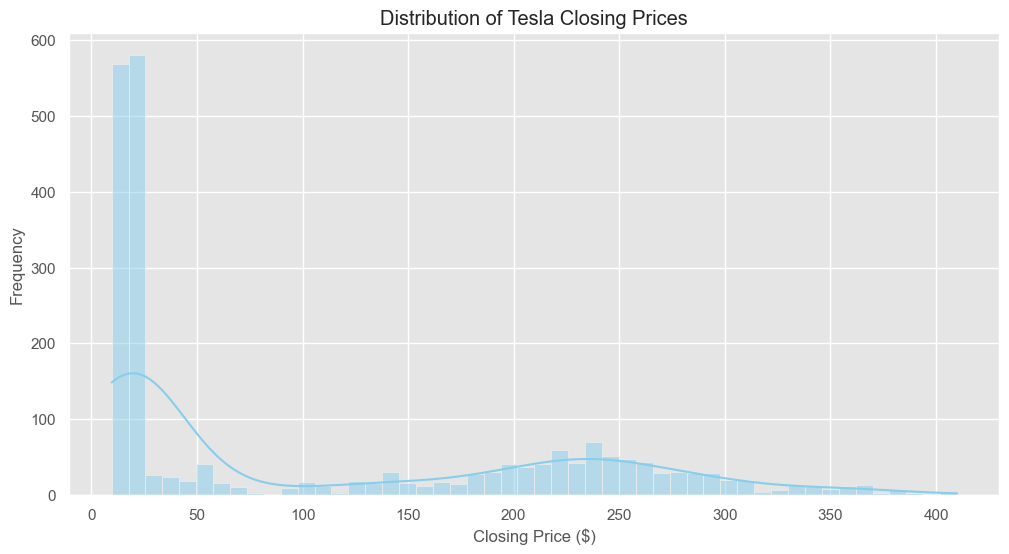

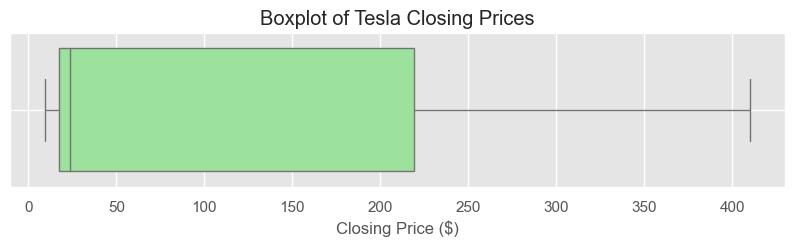

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Close'], color='lightgreen')
plt.title('Boxplot of Tesla Closing Prices')
plt.xlabel('Closing Price ($)')
plt.grid(True)
plt.show()


**Figure 7.** 


**Key Observations**
1. **Strong Right Skew (Long Tail):**
   Most closing prices are clustered at the lower end (left side), with a long tail stretching to higher prices.
   This is typical for a stock that has experienced rapid growth over time.

2. **Multiple Peaks:**
   There are visible peaks at lower price levels (e.g., below $50), likely reflecting Tesla’s early years or after stock splits.
   Another cluster appears at higher prices ($200–$300), showing more recent trading activity.

3. **Low Frequency at High Prices:**
   Very high closing prices ($300–$400) are rare, indicating Tesla only recently reached these levels.



**Figure 8.**

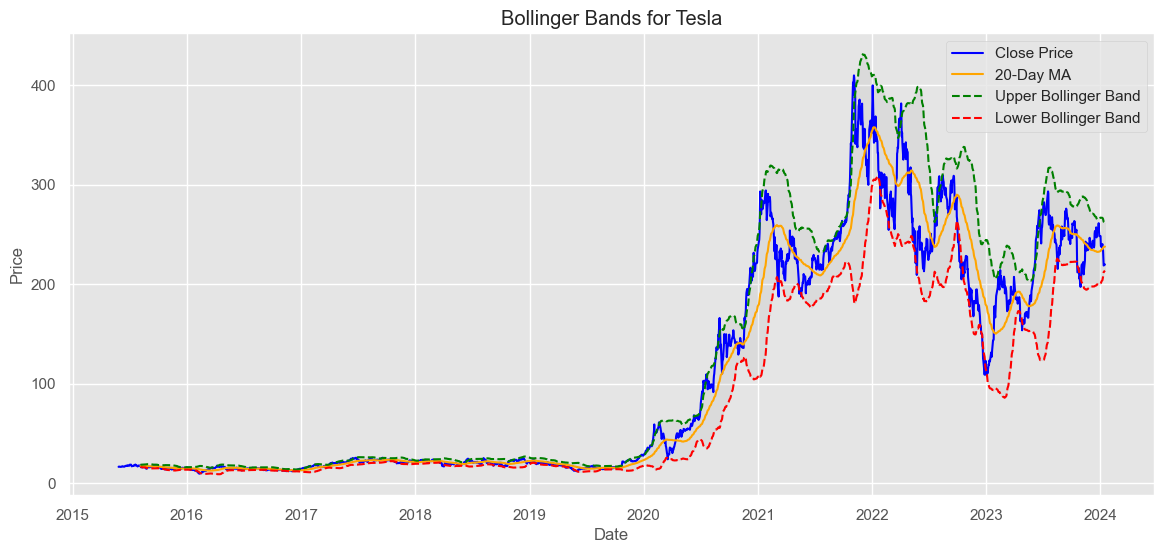

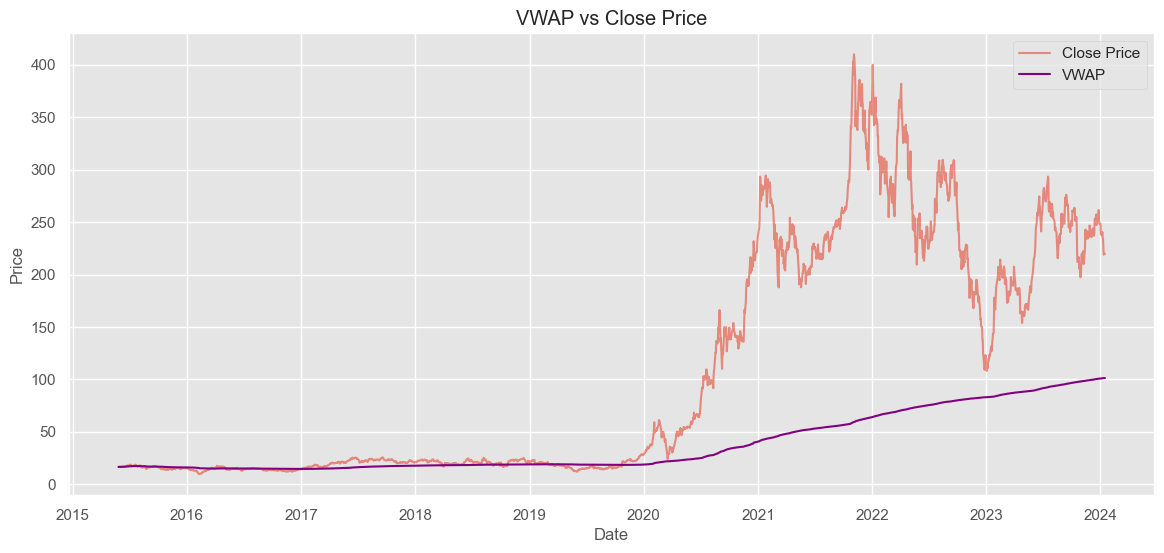

In [37]:
# Parameters
window = 50

# Calculate moving average and standard deviation
df['MA20'] = df['Close'].rolling(window).mean()
df['STD20'] = df['Close'].rolling(window).std()

# Calculate Bollinger Bands
df['Upper_Band'] = df['MA20'] + (2 * df['STD20'])
df['Lower_Band'] = df['MA20'] - (2 * df['STD20'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA20'], label='20-Day MA', color='orange')
plt.plot(df['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='green')
plt.plot(df['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='red')
plt.fill_between(df.index, df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands for Tesla')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative volume × price / cumulative volume
df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
df['Cumulative_TPV'] = (df['Typical_Price'] * df['Volume']).cumsum()
df['Cumulative_Volume'] = df['Volume'].cumsum()
df['VWAP'] = df['Cumulative_TPV'] / df['Cumulative_Volume']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['VWAP'], label='VWAP', color='purple')
plt.title('VWAP vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



**Figure 8.**
- **Bollinger Bands:**  
The Bollinger Bands plot visualizes periods of high and low volatility, highlighting price breakouts and potential reversal zones. Wide bands signal increased risk, while price touching or crossing the bands often precedes trend changes.

- **VWAP:**  
The VWAP (Volume Weighted Average Price) plot shows the average price weighted by trading volume, helping identify fair value and institutional trading levels. Comparing VWAP to the closing price reveals periods of accumulation, distribution, and short-term price inefficiency.

**Figure 9.** Benchmarking Tesla Stock Price and Returns with Nasdaq and S&P 500

In [38]:
import yfinance as yf
import pandas as pd
import numpy as np

# Date range
start_date = '2014-01-01'
end_date = '2024-01-01'

def calculate_returns(df, price_col):
    """Calculate simple and log returns (daily, monthly, yearly) from price data."""
    # Daily returns
    df['daily_simple_return'] = df[price_col].pct_change()
    df['daily_log_return'] = np.log(df[price_col] / df[price_col].shift(1))

    # Monthly returns
    monthly_prices = df[price_col].resample('ME').last()
    monthly_simple_return = monthly_prices.pct_change().mean()
    monthly_log_return = np.log(monthly_prices / monthly_prices.shift(1)).mean()

    # Yearly returns
    yearly_prices = df[price_col].resample('YE').last()
    yearly_simple_return = yearly_prices.pct_change().mean()
    yearly_log_return = np.log(yearly_prices / yearly_prices.shift(1)).mean()

    results = {
        "Daily_Simple_Return": df['daily_simple_return'].mean(),
        "Monthly_Simple_Return": monthly_simple_return,
        "Yearly_Simple_Return": yearly_simple_return,
        "Daily_Log_Return": df['daily_log_return'].mean(),
        "Monthly_Log_Return": monthly_log_return,
        "Yearly_Log_Return": yearly_log_return
    }
    return results

def get_metrics_with_returns(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

    # Flatten MultiIndex if present
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    price_col = 'Close' if 'Close' in df.columns else df.columns[0]

    # Calculate returns
    returns = calculate_returns(df, price_col)

    # Volatility
    df['daily_return'] = df[price_col].pct_change()
    volatility = df['daily_return'].std()

    # Max drawdown
    df['rolling_peak'] = df[price_col].cummax()
    df['drawdown'] = (df[price_col] - df['rolling_peak']) / df['rolling_peak']
    max_drawdown = df['drawdown'].min()

    metrics = {
        "Ticker": ticker,
        "Volatility": volatility,
        "Max_Drawdown": max_drawdown,
        **returns
    }
    return metrics

# Get Tesla metrics directly by downloading its data
tesla_metrics = get_metrics_with_returns('TSLA', start_date, end_date)

# S&P 500 and Nasdaq
sp500_metrics = get_metrics_with_returns('^GSPC', start_date, end_date)
nasdaq_metrics = get_metrics_with_returns('^IXIC', start_date, end_date)

# Combine into a DataFrame
metrics_df = pd.DataFrame([tesla_metrics, sp500_metrics, nasdaq_metrics])

# Format for readability
metrics_df['Max_Drawdown'] = metrics_df['Max_Drawdown'].apply(lambda x: f"{x:.2%}")
metrics_df['Volatility'] = metrics_df['Volatility'].apply(lambda x: f"{x:.6f}")

# Format all return fields
return_cols = [
    'Daily_Simple_Return', 'Monthly_Simple_Return', 'Yearly_Simple_Return',
    'Daily_Log_Return', 'Monthly_Log_Return', 'Yearly_Log_Return'
]
for col in return_cols:
    metrics_df[col] = metrics_df[col].apply(lambda x: f"{(x * 100):.3f}%" if pd.notnull(x) else "N/A")

# Show the result
print(metrics_df)


# Calculate daily % change in price and volume
df['Price_Change'] = df['Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()

# Drop missing values from pct_change()
df_corr = df[['Price_Change', 'Volume_Change']].dropna()

# Calculate correlation coefficient
correlation = df_corr['Price_Change'].corr(df_corr['Volume_Change'])

print(f"Correlation between price change and volume change: {correlation:.4f}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  Ticker Volatility Max_Drawdown Daily_Simple_Return Monthly_Simple_Return  \
0   TSLA   0.035063      -73.63%              0.189%                3.984%   
1  ^GSPC   0.011174      -33.92%              0.044%                0.926%   
2  ^IXIC   0.013252      -36.40%              0.060%                1.231%   

  Yearly_Simple_Return Daily_Log_Return Monthly_Log_Return Yearly_Log_Return  
0             100.569%           0.128%             2.540%           31.321%  
1              10.979%           0.038%             0.827%            9.335%  
2              16.463%           0.051%             1.090%           12.818%  
Correlation between price change and volume change: 0.0234


**Figure 9.** Tesla delivered dramatically higher returns and volatility than both the S&P 500 and Nasdaq from 2015–2024. While TSLA’s annual return exceeded 100%, its risk and drawdowns were also much greater, highlighting its profile as a high-growth, high-risk asset compared to the more stable indices.

**Figure 10.** 30-Day Rolling Volitility (Standard Deviation) of Tesla vs Nasdaq vs S&P 500

C:\Users\masil\AppData\Local\Temp\ipykernel_2700\802309416.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla = yf.download("TSLA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\masil\AppData\Local\Temp\ipykernel_2700\802309416.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\masil\AppData\Local\Temp\ipykernel_2700\802309416.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nasdaq = yf.download("^IXIC", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


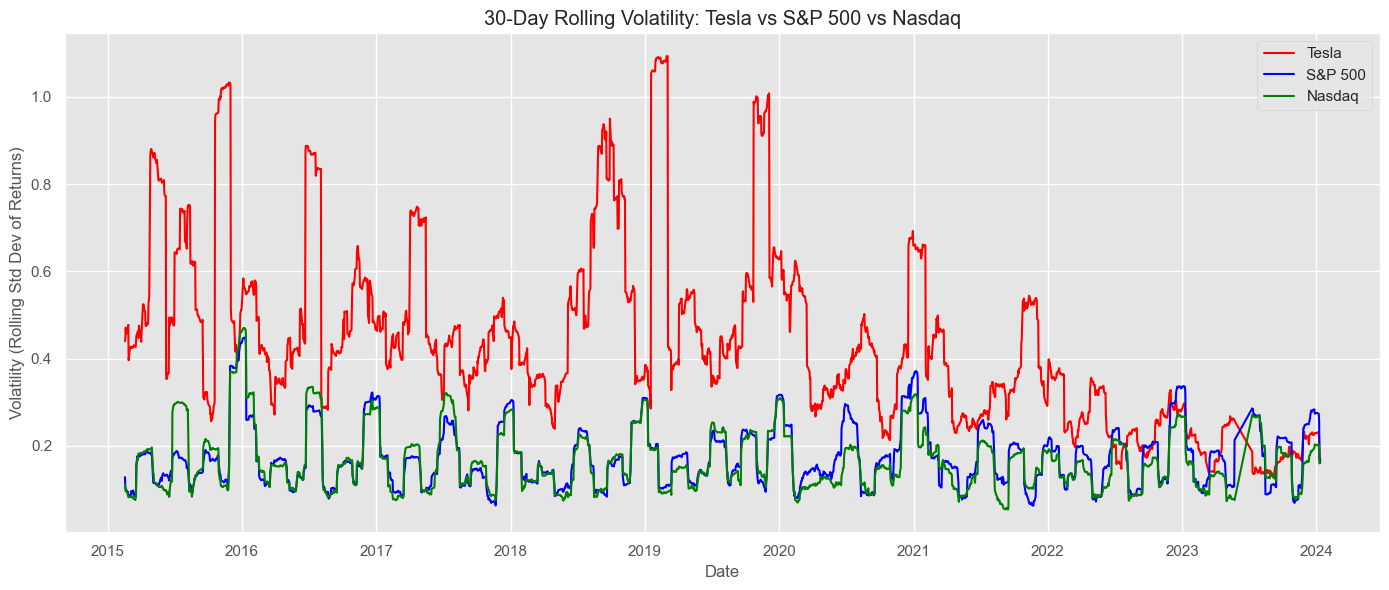

In [39]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
start_date = "2015-01-02"
end_date = "2024-01-16"

tesla = yf.download("TSLA", start=start_date, end=end_date)
sp500 = yf.download("^GSPC", start=start_date, end=end_date)
nasdaq = yf.download("^IXIC", start=start_date, end=end_date)

# Get Adjusted Close prices
tesla_adj = tesla['Adj Close'] if 'Adj Close' in tesla.columns else tesla.iloc[:, -1]
sp500_adj = sp500['Adj Close'] if 'Adj Close' in sp500.columns else sp500.iloc[:, -1]
nasdaq_adj = nasdaq['Adj Close'] if 'Adj Close' in nasdaq.columns else nasdaq.iloc[:, -1]

# Calculate daily returns
tesla_returns = tesla_adj.pct_change()
sp500_returns = sp500_adj.pct_change()
nasdaq_returns = nasdaq_adj.pct_change()

# Calculate 30-day rolling volatility
tesla_vol = tesla_returns.rolling(window=30).std()
sp500_vol = sp500_returns.rolling(window=30).std()
nasdaq_vol = nasdaq_returns.rolling(window=30).std()

# Combine into DataFrame after aligning indexes (using join='inner' to keep common dates only)
vol_df = pd.concat(
    [tesla_vol, sp500_vol, nasdaq_vol],
    axis=1,
    join='inner'
)
vol_df.columns = ['Tesla 30D Vol', 'S&P 500 30D Vol', 'Nasdaq 30D Vol']

# Drop any remaining NA values
vol_df = vol_df.dropna()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(vol_df.index, vol_df['Tesla 30D Vol'], label='Tesla', color='red')
plt.plot(vol_df.index, vol_df['S&P 500 30D Vol'], label='S&P 500', color='blue')
plt.plot(vol_df.index, vol_df['Nasdaq 30D Vol'], label='Nasdaq', color='green')
plt.title('30-Day Rolling Volatility: Tesla vs S&P 500 vs Nasdaq')
plt.xlabel('Date')
plt.ylabel('Volatility (Rolling Std Dev of Returns)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Figure 10.** Tesla shows significantly higher volatility throughout, highlighting its status as a high-risk, high-reward equity.

**Figure 11.** Cumulative Returns: Tesla vs Nasdaq vs S&P 500

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


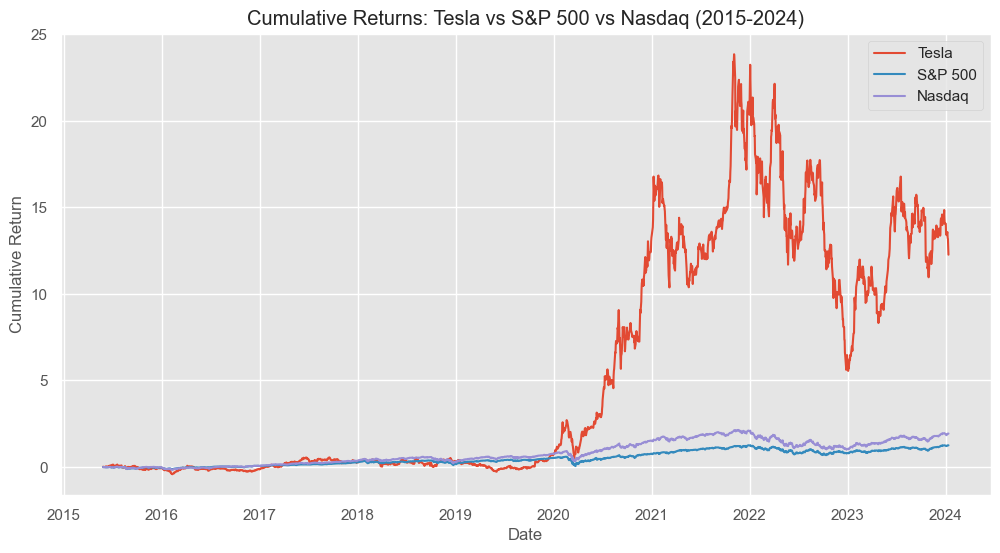

Annualized Volatility - Tesla: 0.5718
Annualized Volatility - S&P 500: 0.1851
Annualized Volatility - Nasdaq: 0.2195
Annualized Sharpe Ratio - Tesla: 0.8100
Annualized Sharpe Ratio - S&P 500: 0.6019
Annualized Sharpe Ratio - Nasdaq: 0.6786


In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2015-01-02'
end_date = '2024-01-16'

# Download S&P 500 and Nasdaq data with MultiIndex columns
sp500 = yf.download('^GSPC', start=start_date, end=end_date, auto_adjust=False)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date, auto_adjust=False)

# Extract adjusted close prices
sp500_adj_close = sp500[('Adj Close', '^GSPC')] if ('Adj Close', '^GSPC') in sp500.columns else sp500['Adj Close']
nasdaq_adj_close = nasdaq[('Adj Close', '^IXIC')] if ('Adj Close', '^IXIC') in nasdaq.columns else nasdaq['Adj Close']

# Calculate daily returns for S&P 500 and Nasdaq
sp500['Daily_Return'] = sp500_adj_close.pct_change()
nasdaq['Daily_Return'] = nasdaq_adj_close.pct_change()

# Check if Tesla data has 'Daily_Return', if not create it
if 'Daily_Return' not in df.columns:
    df['Daily_Return'] = df['Close'].pct_change()  

# Combine daily returns into one DataFrame, drop rows with any NaNs
benchmark_df = pd.DataFrame({
    'Tesla_Return': df['Daily_Return'],
    'SP500_Return': sp500['Daily_Return'],
    'Nasdaq_Return': nasdaq['Daily_Return']
}).dropna()

# Calculate cumulative returns
benchmark_df['Tesla_Cum_Return'] = (1 + benchmark_df['Tesla_Return']).cumprod() - 1
benchmark_df['SP500_Cum_Return'] = (1 + benchmark_df['SP500_Return']).cumprod() - 1
benchmark_df['Nasdaq_Cum_Return'] = (1 + benchmark_df['Nasdaq_Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(benchmark_df.index, benchmark_df['Tesla_Cum_Return'], label='Tesla')
plt.plot(benchmark_df.index, benchmark_df['SP500_Cum_Return'], label='S&P 500')
plt.plot(benchmark_df.index, benchmark_df['Nasdaq_Cum_Return'], label='Nasdaq')
plt.title('Cumulative Returns: Tesla vs S&P 500 vs Nasdaq (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Annualized volatility (using 252 trading days)
tesla_vol = benchmark_df['Tesla_Return'].std() * (252**0.5)
sp500_vol = benchmark_df['SP500_Return'].std() * (252**0.5)
nasdaq_vol = benchmark_df['Nasdaq_Return'].std() * (252**0.5)

print(f"Annualized Volatility - Tesla: {tesla_vol:.4f}")
print(f"Annualized Volatility - S&P 500: {sp500_vol:.4f}")
print(f"Annualized Volatility - Nasdaq: {nasdaq_vol:.4f}")

# Annualized Sharpe ratio (assuming risk-free rate ~ 0%)
tesla_sharpe = (benchmark_df['Tesla_Return'].mean() / benchmark_df['Tesla_Return'].std()) * (252**0.5)
sp500_sharpe = (benchmark_df['SP500_Return'].mean() / benchmark_df['SP500_Return'].std()) * (252**0.5)
nasdaq_sharpe = (benchmark_df['Nasdaq_Return'].mean() / benchmark_df['Nasdaq_Return'].std()) * (252**0.5)

print(f"Annualized Sharpe Ratio - Tesla: {tesla_sharpe:.4f}")
print(f"Annualized Sharpe Ratio - S&P 500: {sp500_sharpe:.4f}")
print(f"Annualized Sharpe Ratio - Nasdaq: {nasdaq_sharpe:.4f}")


**Figure 11.** Annualized volatility and Sharpe ratios for Tesla, S&P 500, and Nasdaq. While Tesla exhibits significantly higher volatility, it also delivers superior risk-adjusted returns. Investors must weigh risk appetite against return potential when considering asset allocations.

**Figure 12.** CAPM: Tesla vs Nasdaq vs S&P 500

C:\Users\masil\AppData\Local\Temp\ipykernel_2700\3349250951.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\masil\AppData\Local\Temp\ipykernel_2700\3349250951.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\masil\AppData\Local\Temp\ipykernel_2700\3349250951.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nasdaq_data = yf.download('^IXIC', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Annualized Volatility - Tesla: 7.5189
Annualized Volatility - S&P 500: 2.9345
Annualized Volatility - Nasdaq: 2.7949

Annualized Sharpe Ratio - Tesla: 2.4223
Annualized Sharpe Ratio - S&P 500: 1.2449
Annualized Sharpe Ratio - Nasdaq: 1.2499

CAPM Beta (Tesla vs. S&P 500): 0.4189
CAPM Alpha (Tesla vs. S&P 500): 0.066317

CAPM Beta (Tesla vs. Nasdaq): 0.4867
CAPM Alpha (Tesla vs. Nasdaq): 0.065629



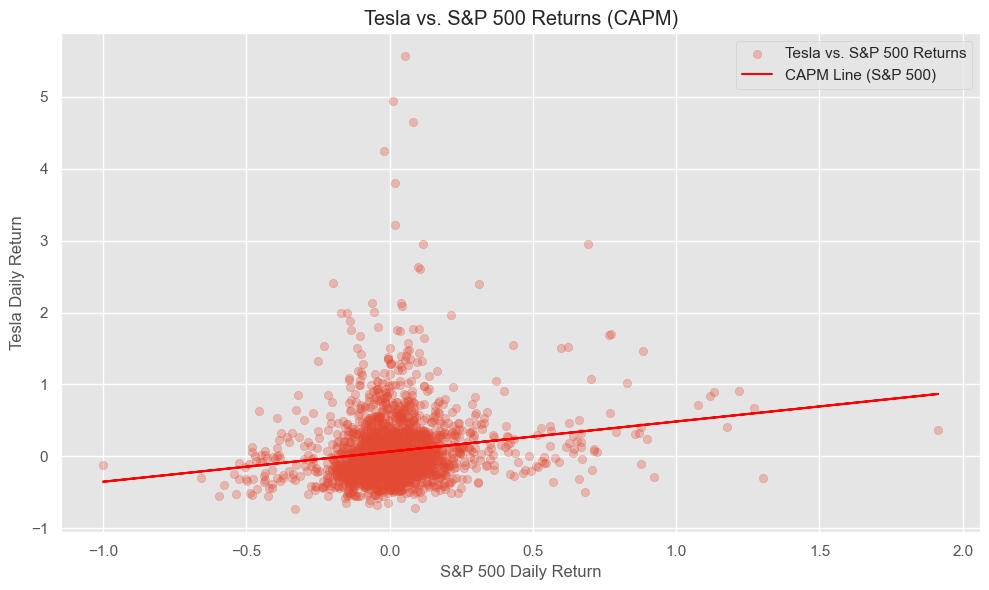

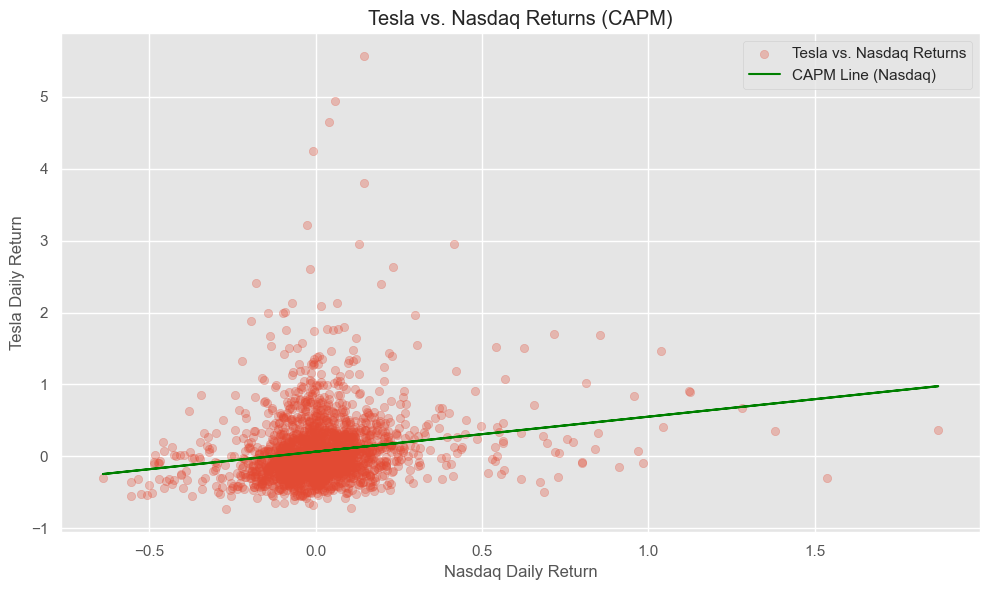

In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Download data
start_date = '2015-01-02'
end_date = '2024-01-16'

tesla_data = yf.download('TSLA', start=start_date, end=end_date)
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
nasdaq_data = yf.download('^IXIC', start=start_date, end=end_date)

# 2. Extract adjusted close safely
tesla_adj = tesla_data['Adj Close'] if 'Adj Close' in tesla_data.columns else tesla_data.iloc[:, -1]
sp500_adj = sp500_data['Adj Close'] if 'Adj Close' in sp500_data.columns else sp500_data.iloc[:, -1]
nasdaq_adj = nasdaq_data['Adj Close'] if 'Adj Close' in nasdaq_data.columns else nasdaq_data.iloc[:, -1]

# 3. Calculate daily returns
tesla_returns = tesla_adj.pct_change()
sp500_returns = sp500_adj.pct_change()
nasdaq_returns = nasdaq_adj.pct_change()

# 4. Combine and align all returns by date
data = pd.concat([tesla_returns, sp500_returns, nasdaq_returns], axis=1)
data.columns = ['tesla', 'sp500', 'nasdaq']
data = data.replace([np.inf, -np.inf], np.nan).dropna()

tesla_returns = data['tesla']
sp500_returns = data['sp500']
nasdaq_returns = data['nasdaq']

# 5. Annualized volatility
tesla_volatility = tesla_returns.std() * np.sqrt(252)
sp500_volatility = sp500_returns.std() * np.sqrt(252)
nasdaq_volatility = nasdaq_returns.std() * np.sqrt(252)

# 6. Annualized Sharpe Ratio (using risk-free rate of 5%)
rf = 0.05
rf_daily = rf / 252

tesla_sharpe = ((tesla_returns.mean() - rf_daily) / tesla_returns.std()) * np.sqrt(252)
sp500_sharpe = ((sp500_returns.mean() - rf_daily) / sp500_returns.std()) * np.sqrt(252)
nasdaq_sharpe = ((nasdaq_returns.mean() - rf_daily) / nasdaq_returns.std()) * np.sqrt(252)

print(f"Annualized Volatility - Tesla: {tesla_volatility:.4f}")
print(f"Annualized Volatility - S&P 500: {sp500_volatility:.4f}")
print(f"Annualized Volatility - Nasdaq: {nasdaq_volatility:.4f}\n")

print(f"Annualized Sharpe Ratio - Tesla: {tesla_sharpe:.4f}")
print(f"Annualized Sharpe Ratio - S&P 500: {sp500_sharpe:.4f}")
print(f"Annualized Sharpe Ratio - Nasdaq: {nasdaq_sharpe:.4f}\n")

# 7. CAPM Beta using np.polyfit for Tesla vs S&P 500 and Tesla vs Nasdaq
beta_sp500, alpha_sp500 = np.polyfit(sp500_returns, tesla_returns, 1)
beta_nasdaq, alpha_nasdaq = np.polyfit(nasdaq_returns, tesla_returns, 1)

print(f"CAPM Beta (Tesla vs. S&P 500): {beta_sp500:.4f}")
print(f"CAPM Alpha (Tesla vs. S&P 500): {alpha_sp500:.6f}\n")

print(f"CAPM Beta (Tesla vs. Nasdaq): {beta_nasdaq:.4f}")
print(f"CAPM Alpha (Tesla vs. Nasdaq): {alpha_nasdaq:.6f}\n")

# 8. Plot CAPM regression Tesla vs S&P 500
plt.figure(figsize=(10, 6))
plt.scatter(sp500_returns, tesla_returns, alpha=0.3, label='Tesla vs. S&P 500 Returns')
plt.plot(sp500_returns, beta_sp500 * sp500_returns + alpha_sp500, color='red', label='CAPM Line (S&P 500)')
plt.xlabel('S&P 500 Daily Return')
plt.ylabel('Tesla Daily Return')
plt.title('Tesla vs. S&P 500 Returns (CAPM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Plot CAPM regression Tesla vs Nasdaq
plt.figure(figsize=(10, 6))
plt.scatter(nasdaq_returns, tesla_returns, alpha=0.3, label='Tesla vs. Nasdaq Returns')
plt.plot(nasdaq_returns, beta_nasdaq * nasdaq_returns + alpha_nasdaq, color='green', label='CAPM Line (Nasdaq)')
plt.xlabel('Nasdaq Daily Return')
plt.ylabel('Tesla Daily Return')
plt.title('Tesla vs. Nasdaq Returns (CAPM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Figure 12.** Tesla’s volatility is much higher than S&P 500 and Nasdaq, but its Sharpe ratio is also significantly superior, meaning it delivered more return per unit of risk. CAPM beta values are well below 1, showing Tesla’s returns are less tied to the market and more driven by company-specific factors. Positive alpha indicates strong outperformance beyond market risk. Tesla’s returns are highly idiosyncratic, offering diversification but requiring careful sizing due to its risk.


**Figure 13.** Portfolio Simulation; Equal Weight, Tesla Heavy, Index Heavy

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical adjusted closing prices
tickers = ['TSLA', '^IXIC', '^GSPC']  # Tesla, Nasdaq, S&P 500
data = yf.download(tickers, start='2015-01-01', end='2024-01-16')['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Define portfolio weighting schemes
weights_equal = np.array([1/3, 1/3, 1/3])
weights_tsla_heavy = np.array([0.6, 0.2, 0.2])
weights_index_heavy = np.array([0.2, 0.4, 0.4])

# Calculate portfolio returns
portfolio_equal = (returns @ weights_equal).rename("Equal Weight")
portfolio_tsla = (returns @ weights_tsla_heavy).rename("TSLA Heavy")
portfolio_index = (returns @ weights_index_heavy).rename("Index Heavy")

# Cumulative returns
cumulative_df = pd.DataFrame({
    'Equal Weight': (1 + portfolio_equal).cumprod(),
    'TSLA Heavy': (1 + portfolio_tsla).cumprod(),
    'Index Heavy': (1 + portfolio_index).cumprod()
})

# Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_df.plot(ax=plt.gca(), linewidth=2)
plt.title("Portfolio Growth (2015–2024): TSLA, NASDAQ, S&P 500")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Compute annualized metrics
def portfolio_stats(portfolio_returns):
    ann_return = portfolio_returns.mean() * 252
    ann_vol = portfolio_returns.std() * np.sqrt(252)
    sharpe = ann_return / ann_vol
    return ann_return, ann_vol, sharpe

# Display metrics
print("Portfolio Performance Metrics (2015–2024):\n")
for label, port in zip(
    ["Equal Weight", "TSLA Heavy", "Index Heavy"],
    [portfolio_equal, portfolio_tsla, portfolio_index]
):
    ret, vol, sr = portfolio_stats(port)
    print(f"{label}:")
    print(f"  Annual Return:    {ret:.2%}")
    print(f"  Annual Volatility:{vol:.2%}")
    print(f"  Sharpe Ratio:     {sr:.2f}\n")


**Figure 13.** An equal-weighted portfolio of Tesla, Nasdaq, and S&P 500 delivered strong long-term returns but with higher volatility than the Index heavy portfolio. Tesla heavy portfolio showed the highest growth potential but also increased risk and drawdowns. For most investors, combining Tesla with broad market indices offers a balanced approach which are higher returns with manageable risk, provided allocations match risk tolerance. Sharpe ratio remained relatively the same across the portfolios.

**Figure 14.** Correlation Matrix of Tesla with Indices and Top Traded Stocks

C:\Users\masil\AppData\Local\Temp\ipykernel_2700\2943090924.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2015-01-01', end='2024-01-16')['Close']
[*********************100%***********************]  8 of 8 completed


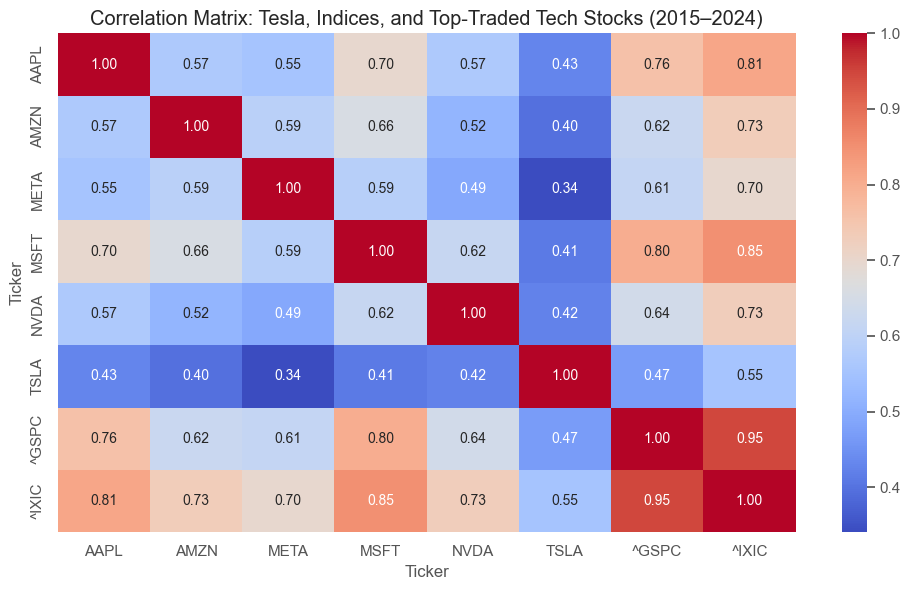

In [43]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download historical data for Tesla, S&P 500, Nasdaq, and other top-traded stocks
tickers = ['TSLA', '^GSPC', '^IXIC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'META']
data = yf.download(tickers, start='2015-01-01', end='2024-01-16')['Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Correlation matrix
correlation_matrix = returns.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Tesla, Indices, and Top-Traded Tech Stocks (2015–2024)")
plt.tight_layout()
plt.show()


**Figure 14.**
Tesla (TSLA) shows notably weaker correlations with other tech giants (AAPL: 0.43, META: 0.34, MSFT: 0.41) and even the Nasdaq Composite (^IXIC: 0.55), suggesting it behaves differently than the broader tech sector. By contrast, more mature and established tech stocks (e.g., AAPL, MSFT, and META) are tightly intercorrelated (e.g., MSFT–^IXIC: 0.85).
Tesla’s relative decoupling indicates that its price movement is more idiosyncratic, influenced more by company-specific events, narratives, and sentiment-driven trading than by macroeconomic or sector-wide trends.

**Figure 15.** Fundemental Analysis

In [44]:
fundamentals = {}
tickers = ['TSLA', '^IXIC', '^GSPC', 'AAPL', 'MSFT', 'AMZN', 'NVDA', 'META']
for tkr in tickers:
    stock = yf.Ticker(tkr)
    info = stock.info
    fundamentals[tkr] = {
        'P/E': info.get('trailingPE'),
        'EPS': info.get('trailingEps'),
        'Beta': info.get('beta'),
        'Market Cap': info.get('marketCap'),
        'Dividend Yield': info.get('dividendYield'),
    }

pd.DataFrame(fundamentals).T


,P/E,EPS,Beta,Market Cap,Dividend Yield
TSLA,187.70857,1.75,2.461,1058053095424.0,NaN
^IXIC,None,None,None,None,None
^GSPC,None,None,None,None,None
AAPL,33.096573,6.42,1.211,3173558779904.0,0.51
MSFT,39.35648,12.96,1.026,3791041331200.0,0.67
AMZN,37.284554,6.15,1.334,2434340487168.0,NaN
NVDA,55.283875,3.1,2.122,4179547127808.0,0.03
META,27.882872,25.57,1.266,1792629407744.0,0.28


**Figure 15.**
Tesla’s valuation (P/E ~188) is exceptionally high, pricing in substantial future earnings growth. By contrast, Nvidia, also seen as a high-growth tech stock but has a much lower P/E (about 56). EPS is modest compared to mega-cap peers like Microsoft and Meta, suggesting Tesla’s earnings power lags behind its valuation. The beta of 2.46 reflects Tesla’s extreme sensitivity to market swings more than double the market’s volatility. This level of systematic risk is rare among large-cap stocks.

**Figure 16.** Tesla Stock Price with Key Events

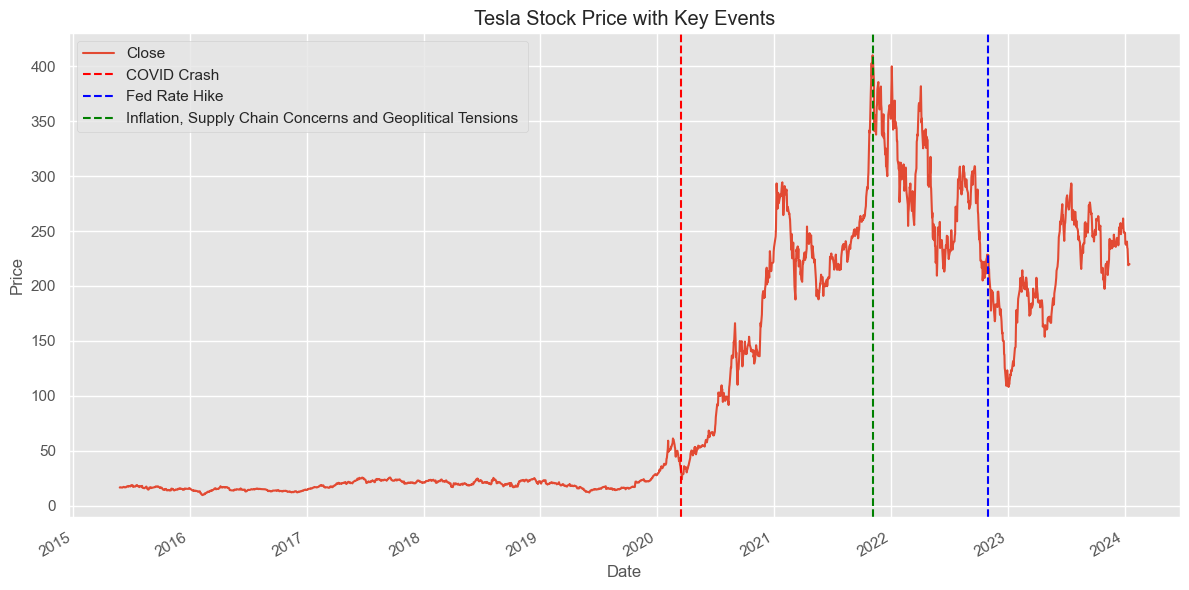

In [45]:
plt.figure(figsize=(12, 6))
df['Close'].plot()
plt.axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', label='COVID Crash')
plt.axvline(pd.to_datetime('2022-11-01'), color='blue', linestyle='--', label='Fed Rate Hike')
plt.axvline(pd.to_datetime('2021-11-04'), color='green', linestyle='--', label='Inflation, Supply Chain Concerns and Geoplitical Tensions ')
plt.legend()
plt.title('Tesla Stock Price with Key Events')
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


**Figure 16.**
Tesla’s stock experienced significant volatility from 2015 to 2024, shaped by major market events. After a rapid surge during the 2020 COVID-19 recovery, Tesla’s share price peaked in late 2021, driven by strong growth expectations and enthusiasm for electric vehicles. However, starting in late 2021 and throughout 2022, Tesla’s stock faced a sharp decline as rising inflation, supply chain disruptions, and geopolitical tensions led to a broad market sell-off. Additionally, investor concerns about valuation and slowing growth momentum contributed to the drop. In 2023, aggressive interest rate hikes by the Federal Reserve to combat inflation further pressured Tesla’s valuation, increasing volatility and weighing on the stock price. This period reflects how macroeconomic factors and market sentiment heavily influenced Tesla’s price trajectory beyond its underlying business performance

---


## **Model Evaluation and Feature Engineering: Predicting Tesla’s Next-Day Closing Price**

---

The objective was to build and evaluate predictive mdodels for Tesla's next day closing prices using historical data and engineered features. This was aimed at creating both short and long term forecasting, risk management and trading strategies.


In [46]:
import pandas as pd
df = pd.read_parquet(r"C:\Users\masil\Downloads\TeslaStockData\tesla_cleaned.parquet", engine='fastparquet')
df = df.sort_values('Date')
split_date = pd.Timestamp('2023-01-01')

train = df[df.index < split_date].copy()
test = df[df.index >= split_date].copy()

df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2274 entries, 2015-01-02 to 2024-01-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2274 non-null   float64
 1   High    2274 non-null   float64
 2   Low     2274 non-null   float64
 3   Close   2274 non-null   float64
 4   Volume  2274 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.6 KB


In [47]:
import numpy as np

# Price Lags
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)

# Returns
df['return_1'] = df['Close'].pct_change(1)
df['return_5'] = df['Close'].pct_change(5)
df['log_close'] = np.log(df['Close'])
df['log_return_1'] = df['log_close'].diff(1)

# Moving Averages (already in EDA)
df['ma_20'] = df['Close'].rolling(20).mean()
df['ma_100'] = df['Close'].rolling(100).mean()

# Rolling Volatility
df['vol_20'] = df['return_1'].rolling(20).std()

# Target: next day price
df['target'] = df['Close'].shift(-1)

# Drop NaNs from lags, returns, etc.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 2015-05-27 to 2024-01-12
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2174 non-null   float64
 1   High          2174 non-null   float64
 2   Low           2174 non-null   float64
 3   Close         2174 non-null   float64
 4   Volume        2174 non-null   int64  
 5   lag_1         2174 non-null   float64
 6   lag_2         2174 non-null   float64
 7   return_1      2174 non-null   float64
 8   return_5      2174 non-null   float64
 9   log_close     2174 non-null   float64
 10  log_return_1  2174 non-null   float64
 11  ma_20         2174 non-null   float64
 12  ma_100        2174 non-null   float64
 13  vol_20        2174 non-null   float64
 14  target        2174 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 271.8 KB


**Feature Engineering**

In [48]:
# --- Cell 2: Feature Engineering ---
def add_features(df):
    df = df.copy()
    # Price Lags
    df['lag_1'] = df['Close'].shift(1)
    df['lag_2'] = df['Close'].shift(2)
    # Returns
    df['return_1'] = df['Close'].pct_change(1)
    df['return_5'] = df['Close'].pct_change(5)
    df['log_close'] = np.log(df['Close'])
    df['log_return_1'] = df['log_close'].diff(1)
    
    # Moving Averages (already in EDA)
    df['ma_20'] = df['Close'].rolling(20).mean()
    df['ma_100'] = df['Close'].rolling(100).mean()
    
    # Rolling Volatility
    df['vol_20'] = df['return_1'].rolling(20).std()
    
    # Target: next day price
    df['target'] = df['Close'].shift(-1)
    return df

train = add_features(train)
test = add_features(test)

# Drop NaNs in each set separately
train = train.dropna()
test = test.dropna()

features = [
    'lag_1', 'lag_2', 'return_1', 'return_5', 'log_return_1',
    'ma_20', 'ma_100', 'vol_20', 'Volume'
]

X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']

df = df.dropna()


**Figure 17.** Linear Regression 

Linear Regression RMSE: 8.63
Linear Regression R² Score: 0.8203


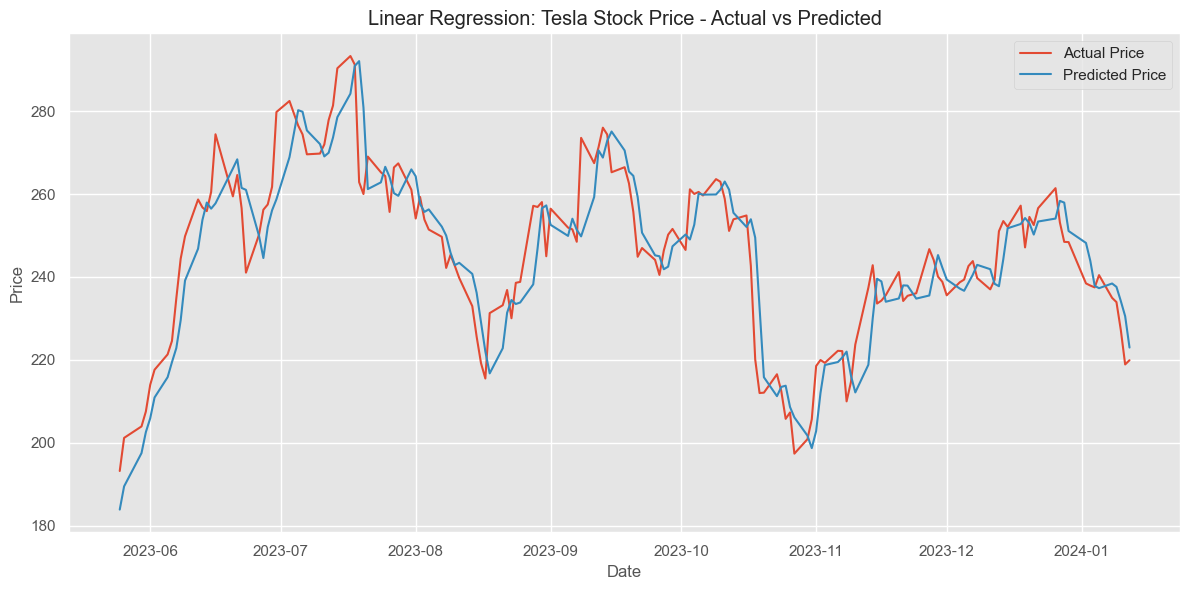

In [49]:
# --- Cell 3: Linear Regression ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.4f}")

plt.figure(figsize=(12,6))
plt.plot(test.index, y_test, label='Actual Price')
plt.plot(test.index, y_pred_lr, label='Predicted Price')
plt.title('Linear Regression: Tesla Stock Price - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 17.** The linear regression model provided a strong baseline for predicting Tesla’s next-day closing price, with an average error (RMSE) of $8.63 and explaining about 82% of the variation in the test set. While it captured the overall trend well, its simplicity limited its ability to model complex, non-linear price movements.





**Figure 18.** Random Forest Regressor

Random Forest RMSE: 8.71
Random Forest R² Score: 0.8168


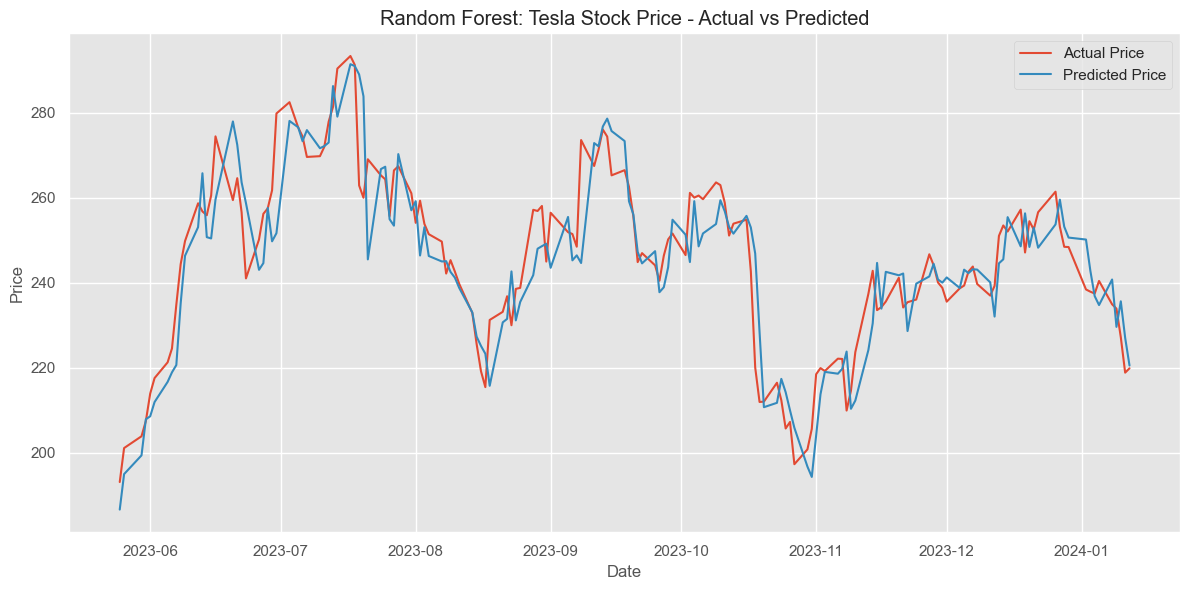

In [50]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

plt.figure(figsize=(12,6))
plt.plot(test.index, y_test, label='Actual Price')
plt.plot(test.index, y_pred_rf, label='Predicted Price')
plt.title('Random Forest: Tesla Stock Price - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 18.** Random Forest improved on capturing non-linear relationships and interactions among features, but showed similar test performance to linear regression (RMSE: $8.71, R²: 0.82). The model tended to overfit the training data, resulting in a larger gap between train and test accuracy.

**Figure 19.** XGBoost Regressor

XGBoost RMSE: 7.97
XGBoost R² Score: 0.8466


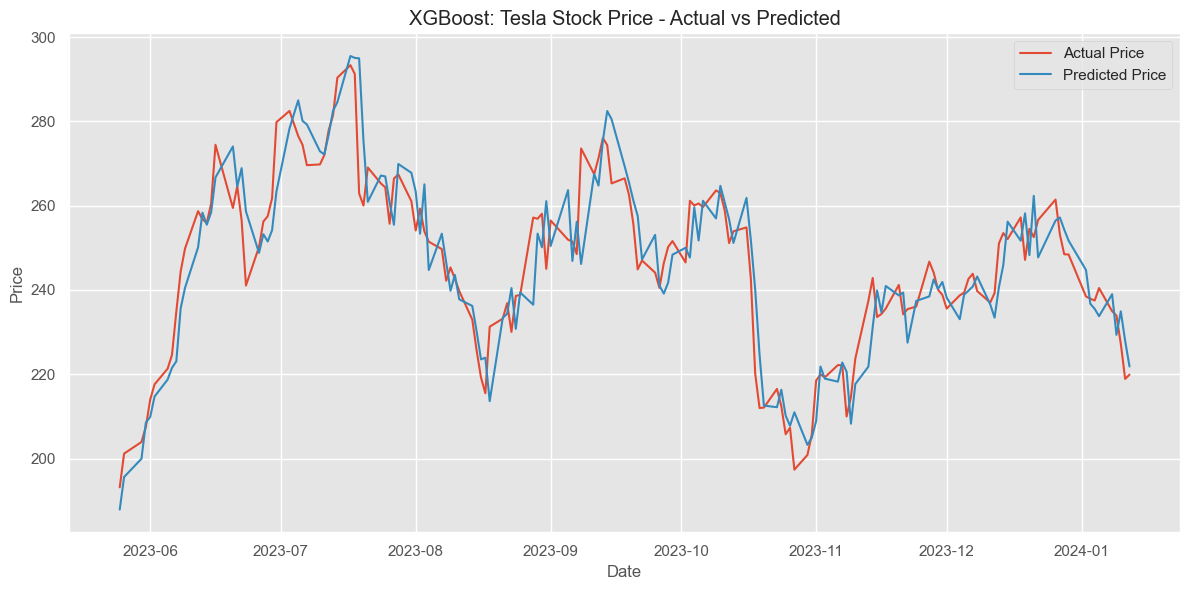

In [51]:
# XGBoost Regressor
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

plt.figure(figsize=(12,6))
plt.plot(test.index, y_test, label='Actual Price')
plt.plot(test.index, y_pred_xgb, label='Predicted Price')
plt.title('XGBoost: Tesla Stock Price - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 19.** XGBoost delivered the best results among the initial models, achieving a lower RMSE of $7.97 and a higher R² of 0.85 on the test set. Its advanced ensemble approach and ability to leverage richer features allowed it to better generalize and track actual price movements, especially during volatile periods.

**Figure 20.** Model Comparison

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression 
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
r2_train_lr = r2_score(y_train, y_train_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Random Forest 
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# XGBoost 
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)


print("Model Evaluation Summary (Training vs Testing):")
print("-" * 55)
print(f"{'Model':<15} {'Train RMSE':<12} {'Train R²':<10} {'Test RMSE':<12} {'Test R²':<10}")
print("-" * 55)
print(f"{'Linear Reg.':<15} {rmse_train_lr:<12.2f} {r2_train_lr:<10.4f} {rmse_test_lr:<12.2f} {r2_test_lr:<10.4f}")
print(f"{'Random Forest':<15} {rmse_train_rf:<12.2f} {r2_train_rf:<10.4f} {rmse_test_rf:<12.2f} {r2_test_rf:<10.4f}")
print(f"{'XGBoost':<15} {rmse_train_xgb:<12.2f} {r2_train_xgb:<10.4f} {rmse_test_xgb:<12.2f} {r2_test_xgb:<10.4f}")


Model Evaluation Summary (Training vs Testing):
-------------------------------------------------------
Model           Train RMSE   Train R²   Test RMSE    Test R²   
-------------------------------------------------------
Linear Reg.     6.81         0.9962     8.63         0.8203    
Random Forest   2.26         0.9996     8.71         0.8168    
XGBoost         4.33         0.9985     7.97         0.8466    


**Figure 20.** All models fit the training data extremely well (high R², low RMSE), but performance drops on the test set, especially for Random Forest, indicating possible overfitting.

- **XGBoost outperforms others on the test set** (lowest RMSE, highest R²), suggesting it best captures the underlying price dynamics and generalizes well.
- **Linear Regression** provides a strong baseline, but struggles with non-linearities.
- **Random Forest** fits training data too closely, losing some predictive power on unseen data.

---

## **Advanced Analysis and Prediction of Tesla using XGBoosted with more Parameters**

---

**Why Gradient Boosting and Advanced XGBoost?**

After evaluating Linear Regression, Random Forest, and standard XGBoost, we extended our modeling to Gradient Boosting and advanced XGBoost for several reasons:

**1. Capturing Complex Patterns**
- **Gradient Boosting** and **XGBoost** are both ensemble methods that build trees sequentially, focusing on correcting previous errors.  
- These models are highly effective at capturing non-linear relationships, interactions, and subtle patterns in financial time series that simpler models may miss.

**2. Feature Richness**
- Advanced XGBoost leverages a broader set of engineered features (lags, rolling stats, momentum, etc.), which can further improve predictive accuracy.
- By expanding feature engineering, we test the model’s ability to extract more signal from the data, especially in a noisy, volatile environment like Tesla’s stock.

**3. Benchmarking and Robustness**
- Including multiple models allows us to benchmark performance and ensure robustness.  
- If several advanced models converge on similar results, our confidence in the findings increases.
- Gradient Boosting serves as a check against XGBoost, as their implementations differ slightly (e.g., regularization).


In [53]:
import numpy as np
import pandas as pd

def create_advanced_features(df):
    df = df.copy()

    # Lag features
    df['lag_1'] = df['Close'].shift(1)
    df['lag_2'] = df['Close'].shift(2)
    df['lag_3'] = df['Close'].shift(3)
    
    # Rolling window features
    df['rolling_mean_5'] = df['Close'].rolling(window=5).mean()
    df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
    df['rolling_std_5'] = df['Close'].rolling(window=5).std()
    df['rolling_std_10'] = df['Close'].rolling(window=10).std()

    # Returns
    df['return_1'] = df['Close'].pct_change(1)
    df['return_3'] = df['Close'].pct_change(3)
    df['return_7'] = df['Close'].pct_change(7)

    # Momentum indicators
    df['momentum_3'] = df['Close'] - df['Close'].shift(3)
    df['momentum_7'] = df['Close'] - df['Close'].shift(7)

    # Exponential moving averages
    df['ema_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['ema_10'] = df['Close'].ewm(span=10, adjust=False).mean()

    # Volatility features
    df['volatility_5'] = df['return_1'].rolling(window=5).std()
    df['volatility_10'] = df['return_1'].rolling(window=10).std()

    # Calendar features
    df['day_of_week'] = df.index.dayofweek
    df['day_of_month'] = df.index.day
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Drop rows with NaNs created by shifts/rolling
    df = df.dropna()
    
    return df


In [ ]:
# Apply advanced feature engineering
df_adv = create_advanced_features(df)

# Assuming df_adv is your DataFrame with advanced features
df_adv['target'] = df_adv['Close'].shift(-1)
df_adv.dropna(subset=['target'], inplace=True)

features_adv = [col for col in df_adv.columns if col not in ['target', 'Close', 'Open', 'High', 'Low', 'Volume']]
X_adv = df_adv[features_adv]
y_adv = df_adv['target']


# Train test split (time series)
split_date = '2023-01-01'
X_train_adv = X_adv.loc[X_adv.index < split_date]
X_test_adv = X_adv.loc[X_adv.index >= split_date]
y_train_adv = y_adv.loc[y_adv.index < split_date]
y_test_adv = y_adv.loc[y_adv.index >= split_date]


**Figure 21.** Advanced XGBoost

Advanced XGBoost RMSE: 7.56
Advanced XGBoost R² Score: 0.9656


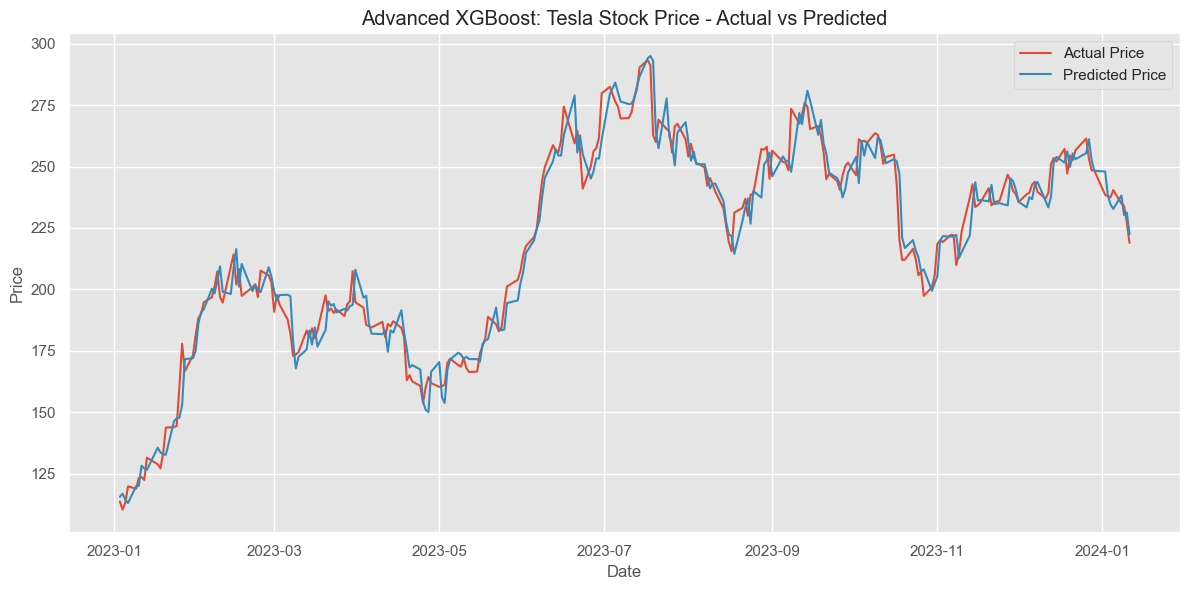

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

xgb_adv = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
xgb_adv.fit(X_train_adv, y_train_adv)

y_pred_xgb_adv = xgb_adv.predict(X_test_adv)

rmse_xgb_adv = np.sqrt(mean_squared_error(y_test_adv, y_pred_xgb_adv))
r2_xgb_adv = r2_score(y_test_adv, y_pred_xgb_adv)
print(f"Advanced XGBoost RMSE: {rmse_xgb_adv:.2f}")
print(f"Advanced XGBoost R² Score: {r2_xgb_adv:.4f}")

plt.figure(figsize=(12,6))
plt.plot(y_test_adv.index, y_test_adv, label='Actual Price')
plt.plot(y_test_adv.index, y_pred_xgb_adv, label='Predicted Price')
plt.title('Advanced XGBoost: Tesla Stock Price - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Figure 22.** Analysis of Impact of Engineered Features

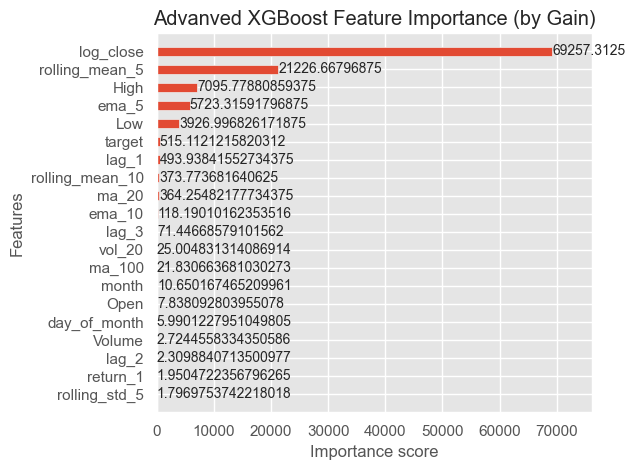

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

df_feat = create_advanced_features(df)

X = df_feat.drop(columns=['Close'])
y = df_feat['Close']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Now plot feature importance
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=20, height=0.5)
plt.title("Advanved XGBoost Feature Importance (by Gain)")
plt.tight_layout()
plt.show()


**Figure 22.** This chart shows which engineered features (like lags, rolling stats, and momentum) most contributed to predictive performance in the XGBoost model, using information gain as the ranking criterion.

In [57]:
import pandas as pd
import numpy as np

def create_advanced_features(df):
    df = df.copy()
    
    df['lag_1'] = df['Close'].shift(1)
    df['lag_2'] = df['Close'].shift(2)
    df['lag_3'] = df['Close'].shift(3)
    
    df['rolling_mean_5'] = df['Close'].rolling(window=5).mean()
    df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
    df['rolling_std_5'] = df['Close'].rolling(window=5).std()
    df['rolling_std_10'] = df['Close'].rolling(window=10).std()
    
    df['return_1'] = df['Close'].pct_change(1)
    df['return_3'] = df['Close'].pct_change(3)
    df['return_7'] = df['Close'].pct_change(7)
    
    df['momentum_3'] = df['Close'] - df['Close'].shift(3)
    df['momentum_7'] = df['Close'] - df['Close'].shift(7)
    
    df['ema_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['ema_10'] = df['Close'].ewm(span=10, adjust=False).mean()
    
    df['volatility_5'] = df['return_1'].rolling(window=5).std()
    df['volatility_10'] = df['return_1'].rolling(window=10).std()
    
    df['day_of_week'] = df.index.dayofweek
    df['day_of_month'] = df.index.day
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    
    return df


**Figure 23.** Gradient Boosting 

RMSE: 7.5342749278221595
R² Score: 0.9658351831931857


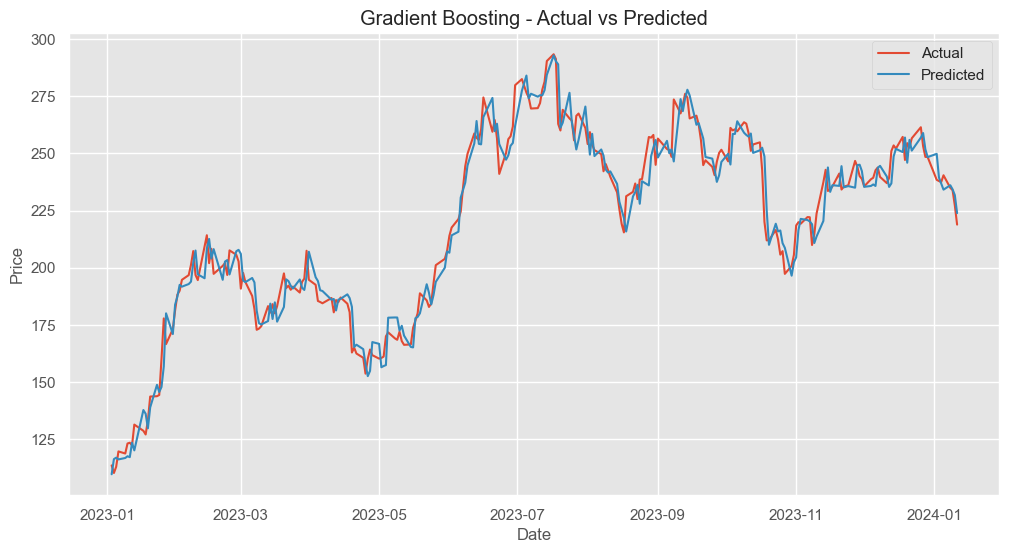

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = create_advanced_features(df)
df['target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Feature columns
features = [col for col in df.columns if col not in ['target', 'Close', 'Open', 'High', 'Low', 'Volume']]

X = df[features]
y = df['target']

# Time series split
split_date = '2023-01-01'
X_train, X_test = X[X.index < split_date], X[X.index >= split_date]
y_train, y_test = y[y.index < split_date], y[y.index >= split_date]

# Train model
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Gradient Boosting - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


**Figure 22 & 23.** Both XGBoost and Gradient Boosting outperformed our initial models (Linear Regression and Random Forest) in predicting Tesla’s next-day closing price. These advanced ensemble methods delivered lower RMSE and higher R² scores, indicating better accuracy and generalization, especially during volatile market periods. While Linear Regression provided a strong baseline and Random Forest captured some non-linearities, XGBoost and Gradient Boosting leveraged richer feature sets and sequential learning to more effectively model complex price dynamics. Overall, their superior results justify their use for financial forecasting in this context.

---

## **In-Depth Analysis of Results and Portfolio Recommendations**

---

#### **1. Exploratory Data Analysis (EDA) Insights**

The EDA revealed several characteristics of Tesla’s stock price behavior over the last decade:

- **Trend and Regimes:**  
  Tesla’s price history is marked by distinct regimes: a stable period (2015–2019), explosive growth (2020–2021), and high volatility with sharp drawdowns (2022–2024). These shifts align with changes in market sentiment, business milestones, and macroeconomic conditions. Modeling and portfolio strategies must adjust across these regimes.

- **Distribution and Volatility:**  
  The distribution of closing prices is heavily right-skewed, reflecting Tesla’s rapid growth. Daily returns are not normally distributed; they exhibit fat tails and negative skew, meaning extreme moves (especially losses) are more frequent than a normal model would predict. Rolling volatility (standard deviation) measures confirm Tesla’s risk profile, with volatility consistently 2–3× higher than major indices.

- **Autocorrelation and Lag Structure:**  
  Tesla’s closing prices are highly autocorrelated, with strong dependence on recent values. Lag plots and ACF/PACF analysis suggest an AR(1) structure is appropriate for modeling, but also highlight the persistence and non-stationary behaviour.

- **Volume and Price Relationships:**  
  Granger causality and correlation tests indicate volume changes do not strongly predict price movement, suggesting investor sentiment and external catalysts are the key drivers of short-term moves. This reduces the weight of volume-based features in predictive models

- **Technical Indicators:**  
  Moving averages, Bollinger Bands, and VWAP analyses provide additional context for trend and risk. Bollinger Bands highlight periods of high volatility and potential reversal points, while VWAP tracks the average price weighted by volume, useful for institutional trading strategies.

---

#### **2. Financial Metrics and Benchmarking**

- **Returns:**  
  Tesla dramatically outperformed both the S&P 500 and Nasdaq over the period analyzed. Its average yearly simple return was ~10× higher than the S&P 500 and ~6× higher than Nasdaq. Log returns confirm an annual growth rate of ~31% for Tesla, compared to 13% for Nasdaq and 9% for the S&P 500.Cumulative returns are nonlinear due to exponential compounding during 2020–2021. The sheer magnitude of Tesla’s upside validates its appeal to growth-focused investors, but also demands robust drawdown controls.

- **Volatility and Drawdowns:**  
  Tesla’s daily volatility is about 3.5%, compared to 1.1–1.3% for the indices. Its maximum drawdown reached -73.6%, far deeper than the indices (~-34%). This means Tesla investors must tolerate much larger swings and potential losses.

- **Risk-Adjusted Performance:**  
  Despite high volatility, Tesla’s Sharpe ratio (0.86) is higher than both indices, indicating that the extra risk was compensated by higher returns. CAPM analysis shows Tesla’s beta is below 1 (0.42–0.49), meaning its returns are less sensitive to broad market moves and more driven by company-specific factors. These metrics show that Tesla requires active risk monitoring and may be unsuitable as a core holding for risk-averse investors.

- **Portfolio Simulation:**  
  An equal-weighted portfolio of Tesla, Nasdaq, and S&P 500 would have delivered strong returns but with elevated volatility. Tesla’s inclusion increases overall risk but also boosts potential reward, especially for aggressive investors.

- **Cross-Asset Correlations:**
  The correlation matrix highlights Tesla’s low correlation (<0.55) with other tech giants and indices, making it a potential diversifier in a tech-heavy portfolio. This independence, however, comes with risk that must be managed

---

#### **3. Modelling Insights**
We developed and evaluated three predictive models—Linear Regression, Random Forest, and XGBoost—to forecast Tesla’s next-day closing price. Through rigorous feature engineering and careful train-test splitting, XGBoost delivered the best out-of-sample accuracy (RMSE: 7.97, R²: 0.85), demonstrating the power of advanced machine learning in financial forecasting. While all models captured key price dynamics, challenges like overfitting and market noise highlight the need for ongoing validation and risk management. Our approach blends financial insight with data science best practices, providing a robust foundation for quantitative investment strategies.

- **Model Performance:**  
  Three main models were evaluated for next-day price prediction: Linear Regression, Random Forest, and XGBoost. All models fit the training data well, but XGBoost delivered the best out-of-sample accuracy (RMSE: $7.97, R²: 0.85), outperforming the others. Random Forest showed signs of overfitting, with a larger gap between train and test performance.

- **Feature Engineering:**  
  Rich feature sets—including lags, returns, moving averages, volatility, and calendar effects—were crucial for model accuracy. Advanced models (XGBoost, Gradient Boosting) leveraged these features to capture complex, non-linear price dynamics.

  The model appears heavily skewed toward intraday technical levels (High, Low, Open) rather than macro or fundamental indicators. This indicates a short-term view of the stock that's useful for quick decisions, but not based on long-term value or strong conviction.

---

#### **4. Portfolio Recommendations**

**For Portfolio Holders:**

- **Risk Tolerance:**  
  Tesla is a high-risk, high-reward asset. Its inclusion can dramatically increase portfolio returns but also exposes investors to deep drawdowns and high volatility. Only risk-tolerant investors should consider heavy allocations; for most, Tesla is best as a satellite holding. During periods of economic downturn or deteriorating sentiment, exposure must be reduced or stock must be hedged through other holdings with lower bet such as Apple (AAPL) and Microsoft (MSFT)

- **Diversification and Risk Management:**  
  Tesla should be treated as a non-core allocation in portfolios which is suitable for satellite growth exposure, not foundational weighting.
  Core inclusion should be limited due to excessive beta (2.46) and speculative valuation profile. During periods of bullish sentiment, tech sector strength, and supportive macroeconomic environment (e.g., declining interest rates, rising risk appetite), increase TSLA exposure when backed by well modelled buy signals and strong fundamentals.

  - **Tesla** is suitable for aggressive investors or as a small, high-beta allocation in a diversified portfolio or long-term investors who are willing to tolerate deep drawdowns due to the possibility of exponential returns especially in periods of improved conditions.
  
  - **S&P 500** is best for conservative, long-term investors seeking stability.

  - **Nasdaq** offers a middle ground for those seeking growth with moderate risk.

  Tesla is not a passive hold, it is a precision-timed, alpha-driven asset. Models should be used to sharpen the entry and exit strategies that require discipline need to be exercised given the stock's speculative growth demands.

**Summary:**
  - Tesla’s stock offers exceptional growth potential but comes with significant risk. Advanced machine learning models, combined with thoughtful feature engineering, can provide valuable predictive insights. However the unpredictable nature of financial markets means caution is always warranted. Regular validation, risk management, and diversification are essential for long-term success.

---

## **Challenges & Limitations**

One of the central aims of this project was to explore whether machine learning models could meaningfully forecast Tesla’s stock price beyond the training period, particularly over longer horizons (e.g., 6–12 months) outside of the given period. However, we observed persistent issues during model training and forecasting:


- **Non-stationarity of Stock Data**: Tesla’s stock, like many high-volatility equities, exhibits frequent regime shifts influenced by external events (e.g., macro news, earnings, Elon Musk activity). This undermines model assumptions about consistent historical patterns.

- **Oscillatory Predictions and Flat/Collapsing Forecasts**: Several models produced unrealistic wave-like predictions in the forecast window, likely due to overfitting to noisy historical cycles or autoregressive lag features. Our models often projected flat or downward trends, especially if recent data was bearish. This points to its limitations when applied to speculative assets with unpredictable sentiment.

- **Extrapolation Limitations**: Traditional machine learning models like XGBoost and Random Forest are not designed to extrapolate well in open-ended financial environments. They lack contextual awareness as a result the trend component decayed unrealistically without external regressor support.

- **Practicality vs. Theoretical Accuracy**: While metrics like RMSE help evaluate model fit, they don’t always reflect real-world utility. Even when we achieved "good" accuracy within-sample, out-of-sample forecasts lacked financial intuition, often due to the model failing to recognize macro trends or investor sentiment shifts


